In [1]:
import numpy as np
import pandas as pd

In [2]:
# index = ["pH", "DO", "COD", "BOD", "AN", "TP"]
index_id = [4, 3, 2, 1, 0, 5]

index = ["AN", "BOD", "COD", "DO", "pH", "TP", "WT", "CODCR"]
index_0 = ["AN", "BOD", "COD", "DO", "pH", "TP", "WT"]
index_1 = ["AN", "BOD", "COD", "DO", "pH", "TP", "CODCR"]
columns = ["Mean", "Std", "CV"]

yichang_df = pd.DataFrame(index=index, columns=columns)
ziya_df = pd.DataFrame(index=index, columns=columns)

for file_name in ["yichang", "ziya"]:
    file_path = "../data/" + file_name + ".csv"
    raw_data = pd.read_csv(file_path)
    
    if file_name == "yichang":
        use_columns = list(raw_data.columns)[2:-1]
        index_id = [6, 4, 3, 2, 1, 0, 5]
    else:
        use_columns = list(raw_data.columns)[2:-1]
        index_id = [4, 3, 2, 1, 0, 5, 7]
    
    for i, item in enumerate(use_columns):
        eval(file_name + "_df").loc[index[index_id[i]],"Mean"] = raw_data[item].mean()
        eval(file_name + "_df").loc[index[index_id[i]],"Std"] = raw_data[item].std()
        eval(file_name + "_df").loc[index[index_id[i]],"CV"] = all_cv = raw_data[item].std()/raw_data[item].mean()

In [3]:
yichang_df["region"] = "YRB"
ziya_df["region"] = "HRB"
data = pd.concat([yichang_df, ziya_df], axis=0)
data["indicator"] = data.index.copy()
data

,Mean,Std,CV,region,indicator
AN,0.177694,0.183905,1.03495,YRB,AN
BOD,1.14552,0.394705,0.344563,YRB,BOD
COD,2.20155,0.52396,0.237996,YRB,COD
DO,8.5362,1.51085,0.176994,YRB,DO
pH,7.97297,0.325083,0.0407732,YRB,pH
TP,0.071755,0.0506564,0.705962,YRB,TP
WT,18.4981,6.77166,0.366073,YRB,WT
CODCR,NaN,NaN,NaN,YRB,CODCR
AN,8.1044,14.5549,1.79592,HRB,AN
BOD,12.3225,24.7102,2.00529,HRB,BOD


In [4]:
import seaborn as sns

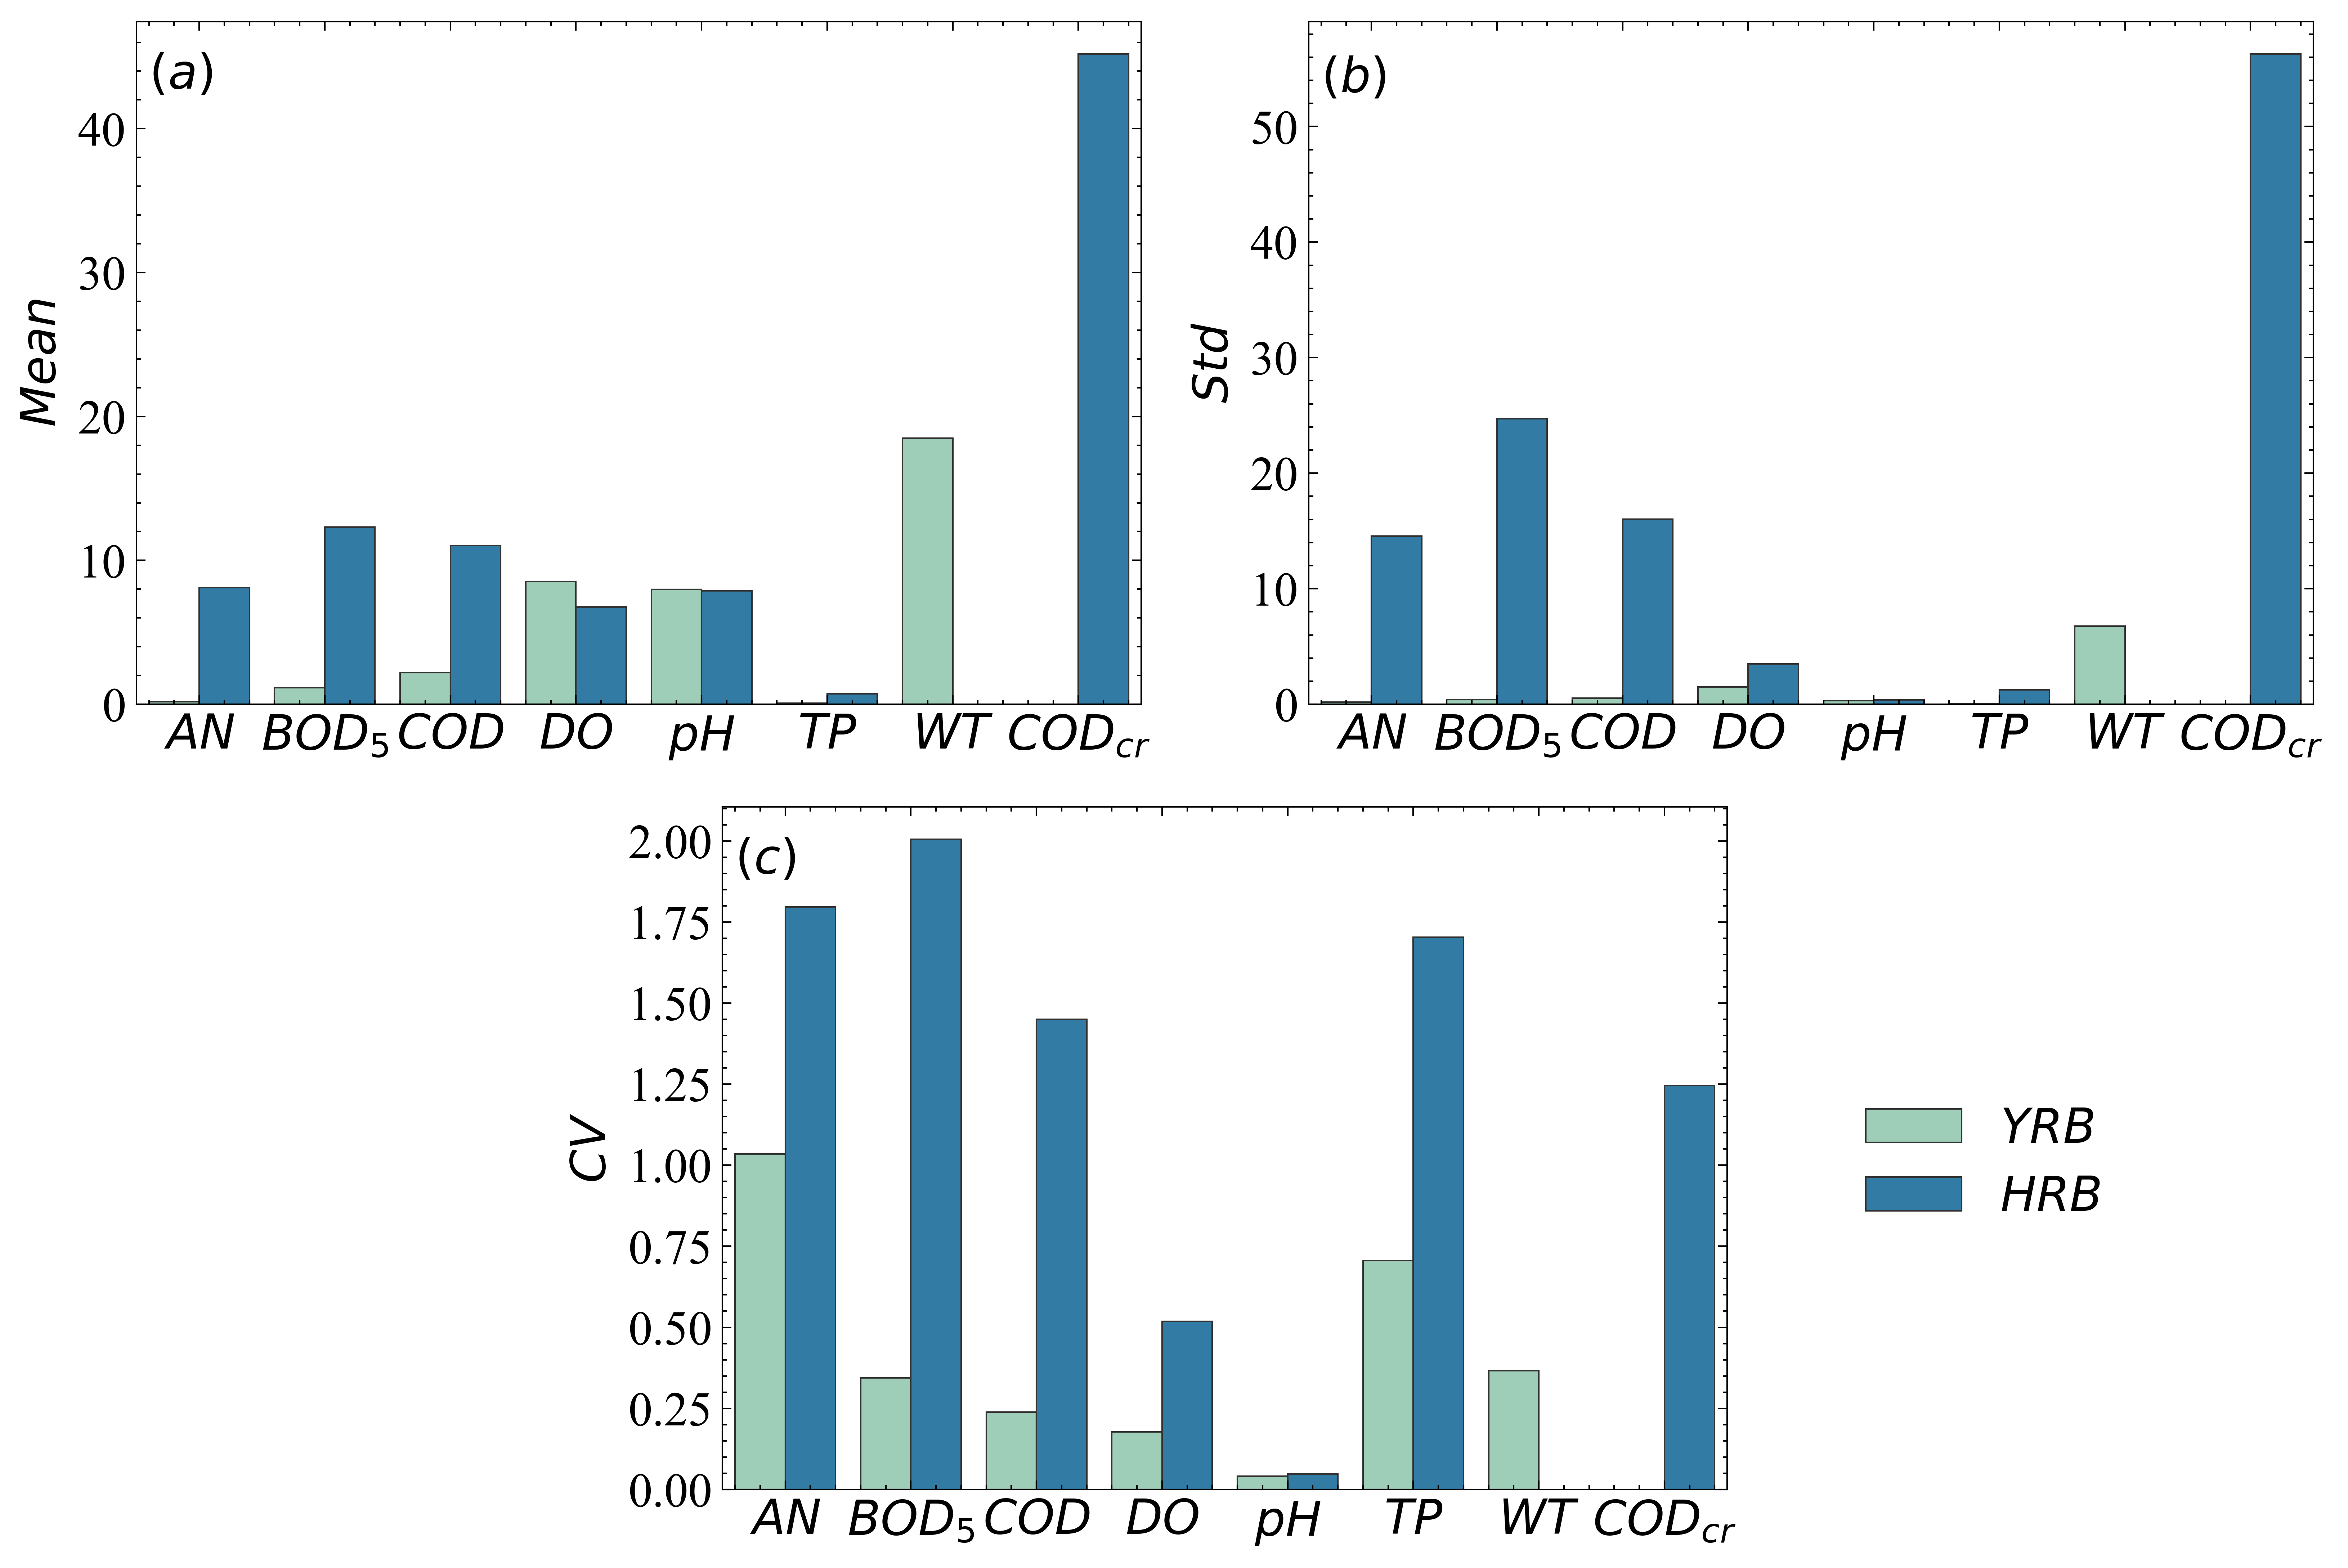

In [5]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
columns = ["Mean", "Std", "CV"]

with plt.style.context(['science','no-latex', 'ieee']):

    plt.rc('font', family='Times New Roman')
    plt.rcParams["font.size"] = 16
    

    plt.figure(figsize=(13, 9))
    gs = gridspec.GridSpec(2, 4)
    
    gs.update(wspace=0.4, hspace=0.15)
    
    ax0 = plt.subplot(gs[0, :2], )
    ax1 = plt.subplot(gs[0, 2:])
    ax2 = plt.subplot(gs[1, 1:3])
    
    ax0.text(-0.4, 42.8, "$(a)$", fontsize=16)
    ax1.text(-0.4, 53, "$(b)$", fontsize=16)
    ax2.text(-0.4, 1.90, "$(c)$", fontsize=16)
    
    for a, statis_item in enumerate(columns):
        
        ax = eval("ax" + str(a))
        
  
        data_1 = yichang_df[statis_item]
        data_2 = ziya_df[statis_item]
        
        ind = np.arange(len(data_1))  # the x locations for the groups
        width = 0.4  # the width of the bars
        sns.barplot(
            data=data,ax=ax,
            x="indicator", y=statis_item, hue="region",
#             palette="Blues_r",
            palette="YlGnBu",
            edgecolor=".2",
            linewidth=0.5,

#             alpha=0.8
        )

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel("$" + statis_item + "$")
        ax.set_xlabel("")
#         ax.legend_.remove()
        # ax.set_title('Scores by group and gender')
        ax.set_xticks(ind)
        ax.set_xticklabels(["$AN$", "$BOD_5$", "$COD$", "$DO$", "$pH$", "$TP$", "$WT$", "$COD_{cr}$"])
    ax0.legend_.remove()
    ax1.legend_.remove()

    ax2.legend(handles=ax.get_legend_handles_labels()[0], labels=["$YRB$", "$HRB$"],bbox_to_anchor=(1.4,0.6), borderaxespad = 0.2, markerscale=2)

    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

    plt.savefig("Figure_12.jpg", dpi=1000, bbox_inches="tight")